# **LetsGrowMore - Internship** 

### **Advance Level (Task-1)**

Author- Ashish 

---

`Github link:`

# **Next Word Predictor using LSTM**

In [95]:
import tensorflow as tf
import string

In [96]:
# Opening the file 
file = open("1661-0.txt")
text = file.read()
data = text.split('\n')

In [97]:
data = data[63:]

In [98]:
data[0]

'To Sherlock Holmes she is always _the_ woman. I have seldom heard him'

In [99]:
# Storing all the values in data String
data = " ".join(data)

# **1. Data Preprocessing**

In [100]:
#cleaning the text by removing punctuation, converting text into lowercase and storing every word in a token
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans("", "", string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

In [101]:
tokens = clean_text(data)
print(tokens[:50])

['to', 'sherlock', 'holmes', 'she', 'is', 'always', 'the', 'woman', 'i', 'have', 'seldom', 'heard', 'him', 'mention', 'her', 'under', 'any', 'other', 'name', 'in', 'his', 'eyes', 'she', 'eclipses', 'and', 'predominates', 'the', 'whole', 'of', 'her', 'sex', 'it', 'was', 'not', 'that', 'he', 'felt', 'any', 'emotion', 'akin', 'to', 'love', 'for', 'irene', 'adler', 'all', 'emotions', 'and', 'that', 'one']


In [102]:
# Creating list of lines having 51 words
length = 51
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i- length:i]
  line = " ".join(seq)
  lines.append(line)
  
lines[0]

'to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly'

# **2. Feature Engineering**

In [103]:
# Importing the necessary liabraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences

In [104]:
#Converting words into tokens with a specific number
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
# Giving every word in line alloted numbers according to the sequence of words.
sequences = tokenizer.texts_to_sequences(lines)

In [105]:
# Converting sequence to numpy so that tensoflow could understand
sequences = np.array(sequences)
# X would be every label except last
# Y would be the last word
X,y = sequences[:, :-1] , sequences[:,-1]

In [106]:
#Setting vocab size to number of tokens
vocab_size = len(tokenizer.word_index) + 1

In [107]:
#Converting the last label into categorical variable for training
y = to_categorical(y, num_classes = vocab_size)

In [108]:
seq_length = 50

# **3. Building the Model**

In [109]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length = seq_length))
model.add(tf.keras.layers.Bidirectional(LSTM(100, return_sequences = True)))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocab_size, activation = 'softmax'))

In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            405650    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 8113)              819413    
Total params: 1,476,363
Trainable params: 1,476,363
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [112]:
model.fit(X,y,batch_size = 256, epochs = 100)

Epoch 1/100
395/395 [==============================] - 30s 63ms/step - loss: 6.5565 - accuracy: 0.0578
Epoch 2/100
395/395 [==============================] - 25s 63ms/step - loss: 6.0705 - accuracy: 0.0719
Epoch 3/100
395/395 [==============================] - 25s 63ms/step - loss: 5.8411 - accuracy: 0.0868
Epoch 4/100
395/395 [==============================] - 25s 63ms/step - loss: 5.6647 - accuracy: 0.0987
Epoch 5/100
395/395 [==============================] - 25s 63ms/step - loss: 5.4970 - accuracy: 0.1094
Epoch 6/100
395/395 [==============================] - 25s 63ms/step - loss: 5.3740 - accuracy: 0.1185
Epoch 7/100
395/395 [==============================] - 25s 63ms/step - loss: 5.2671 - accuracy: 0.1266
Epoch 8/100
395/395 [==============================] - 25s 63ms/step - loss: 5.1721 - accuracy: 0.1337
Epoch 9/100
395/395 [==============================] - 25s 63ms/step - loss: 5.0875 - accuracy: 0.1380
Epoch 10/100
395/395 [==============================] - 25s 63ms/step - l

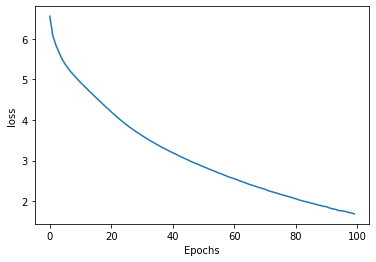

In [119]:
import matplotlib.pyplot as plt
# ploting the result chart
def plot_results(name,ylabel):
  plt.plot(name)
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  
plot_results(model.history.history['loss'], "loss")


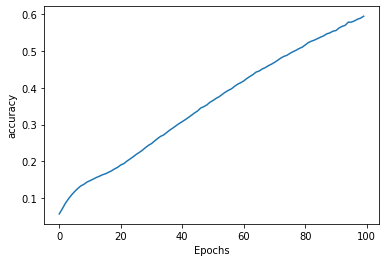

In [120]:
#ploting accuracy with epochs
plot_results(model.history.history['accuracy'], "accuracy")

# **4. Generating words from the Model**

In [121]:
# generating text from the model
def generate_trained_text(seed_text, n_words):
  for _ in range(n_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = 100, padding ='pre')
    predicted = model.predict(token_list, verbose =0)
    #argmax will return the token with maximum probability
    classes=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == classes:
        output_word= word
        break    
    seed_text += " " + output_word
  print(seed_text)

In [122]:
generate_trained_text("Life is hard", 20)

Life is hard quite quite a few moments later he was quite separate and would lead her initials seems to be almost inexplicable
